# Fitting for the Hubble constant

We will use Hubble's [original paper](https://www.pnas.org/content/15/3/168) to compute Hubble's constant from a linear fit to distance versus velocity of extra-galactic nebulae. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from least_squares import least_squares


In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

 Least squares fit of 24 data points
 -----------------------------------
 Hubble's constant slope   b = 454.16 +-  75.24  km/s/Mpc
 Intercept with r axis     a = -40.78 +-  83.44  km/s
 Estimated v error bar sigma = 232.9 km/s
 numpy's values:           b = 454.16 +-  75.24  km/s/Mpc
                           a = -40.78 +-  83.44  km/s/Mpc


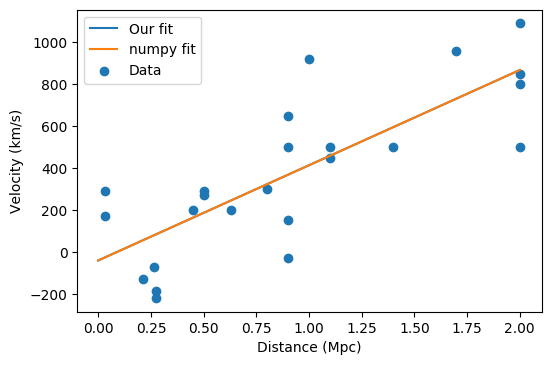

In [3]:
# distances in Mpc
r = np.array([ 0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45, 0.5,
      0.5,   0.63,  0.8,   0.9,   0.9,   0.9,   0.9,  1.0,
      1.1,   1.1,   1.4,   1.7,   2.0,   2.0,   2.0,  2.0 ])

# velocities in km/s
v = np.array([ +170, +290, -130, -70,  -185, -220, +200, +290,
      +270, +200, +300, -30,  +650, +150, +500, +920,
      +450, +500, +500, +960, +500, +850, +800, +1090 ])


n = len(r)   # number of galaxies

if n <= 2 :
    print ('Error! Need at least two data points!')
    exit()

# Use our home-grown version
[a, b, sigma, sigma_a, sigma_b] = least_squares(r,v)

# Check against numpy's version:
p,cov = np.polyfit( r, v, 1, cov=True)

# Print out results
print (' Least squares fit of', n, 'data points')
print (' -----------------------------------')
print (" Hubble's constant slope   b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( b, sigma_b))
print (" Intercept with r axis     a = {0:6.2f} +- {1:6.2f}  km/s".format( a, sigma_a))
print (' Estimated v error bar sigma =', round(sigma, 1), 'km/s')
print (" numpy's values:           b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[0], np.sqrt(cov[0,0])))
print ("                           a = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[1], np.sqrt(cov[1,1])))


rvals = np.linspace(0., 2.0, 21)
f = a + b * rvals
fnp = p[1] + p[0] * rvals
plt.figure(1)
plt.scatter( r, v, label = "Data" )
plt.plot( rvals, f , label="Our fit")
plt.plot( rvals, fnp, label = "numpy fit")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.legend()

plt.show()


In [4]:
rvals

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [5]:
f

array([-40.7836491 ,   4.632195  ,  50.04803909,  95.46388318,
       140.87972727, 186.29557137, 231.71141546, 277.12725955,
       322.54310364, 367.95894773, 413.37479183, 458.79063592,
       504.20648001, 549.6223241 , 595.0381682 , 640.45401229,
       685.86985638, 731.28570047, 776.70154456, 822.11738866,
       867.53323275])

In [6]:
fnp

array([-40.7836491 ,   4.632195  ,  50.04803909,  95.46388318,
       140.87972727, 186.29557137, 231.71141546, 277.12725955,
       322.54310364, 367.95894773, 413.37479183, 458.79063592,
       504.20648001, 549.6223241 , 595.0381682 , 640.45401229,
       685.86985638, 731.28570047, 776.70154456, 822.11738866,
       867.53323275])